In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import scipy.special as sps
import pandas as pd
import random

In [51]:
#Model Variables and Parameters
age_average_x=20
# Current average ages in year for underground and overhead distribution lines (in years)
length_average_x=0.5
# Circuit length in mile for underground and overhead transission and distribution lines
number_circuit= 650
# Numbers showing different circuit in network (Shrewsbury has 191.5 miles overhead, 121.7 miles underground line, eaach circuit is about 25 miles in Larsen paper)
baseyear=2021
#the year in which we are going to start conducting cost analysis
underground_baseyear=121
#Length of undergeound lines in miles in base year
r=0.1
# Discount rate=10%
overhead_line={'lifespan':60,'replcost':104000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
underground_line={'lifespan':45,'replcost':357000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
#overhead_line={'over_or_under':0,'lifespan':60,'replcost':104000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
#underground_line={'over_or_under':1,'lifespan':45,'replcost':357000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
# over_or_under= Type of Line. x=0 for underground distribution lines and x=1 for overhead distribution lines
#lifespan=Useful lifespan of overhead line and underground lines (60 for overhead and 45 for underground)
#replcost_growth_rate= replacement cost annual growth/decay rate 
# om_percentage_replcost= percentage of the overall replacement costs which equals to annual O&M expenses (OPEX) for each type of T&D line
###

In [4]:
shape_age_x=(age_average_x)/(((age_average_x)/2)**2)
#Shape of Gamma distribution required for simulating liene circuits ages
print(shape_age_x)

0.2


In [5]:
scale_age_x=(((age_average_x)/2)**2)/(age_average_x)
#scale of Gamma distribution required for simulating line circuits ages
print(scale_age_x)

5.0


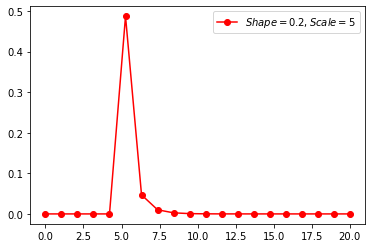

In [6]:
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, shape_age_x, scale_age_x)

plt.plot(x, y, "ro-", label=(r'$Shape=0.2, Scale=5$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of circuits ages

In [7]:
shape_length_x=length_average_x/(length_average_x/2)**2
#Shape of Gamma distribution required for simulating liene circuits ages
print(shape_length_x)

8.0


In [8]:
scale_length_x=(length_average_x/2)**2/length_average_x
#scale of Gamma distribution required for simulating line circuits ages
print(scale_length_x)

0.125


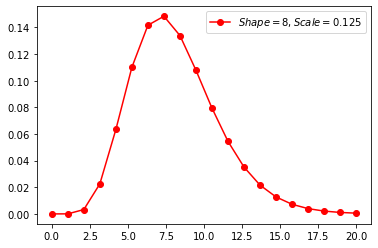

In [9]:
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, shape_length_x, scale_length_x)

plt.plot(x, y, "ro-", label=(r'$Shape=8, Scale=0.125$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of circuits lengths

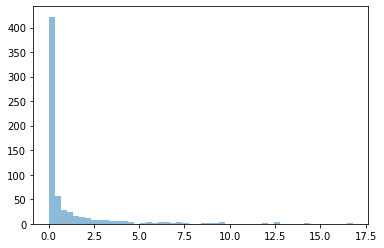

[5.24718232e-02 2.39945001e-02 5.68304829e+00 2.38675170e-04
 1.34833073e+01 1.58131329e+00 1.79988875e+00 1.17450508e-02
 1.23060176e-02 2.67436053e+00 9.71405761e-02 2.42132700e-10
 4.94434739e-08 1.75051251e-02 3.02300677e-08 5.54469913e-02
 2.02567739e+00 9.59921741e+00 4.03489552e-05 6.21786772e-01
 6.79479832e+00 7.69748395e-05 1.14043295e-02 1.16997219e+00
 5.49201947e-01 7.51182615e-03 1.86294352e+00 3.47796635e-04
 2.37979558e-02 6.97610228e-01 6.90007409e-01 3.86631155e+00
 5.55562671e+00 8.76844493e-02 7.40956483e-05 2.17041431e-01
 1.27519368e-01 1.77244444e+00 1.02960155e+00 1.71935867e-01
 6.79109848e-01 5.71160280e-05 1.06049785e-04 1.29110700e+00
 2.69330642e-05 9.96322687e-04 5.49507695e-01 6.05941989e-02
 8.22203055e-01 9.82040652e-03 2.31089639e-06 4.68171227e-03
 2.90587924e-06 9.14465638e-02 5.26390944e-04 1.01579615e+01
 9.69173518e+00 4.86329539e-02 5.15668759e-02 2.67785624e+00
 2.95845196e-03 1.31185949e-04 3.66107899e-05 1.07845064e-03
 9.92550822e-01 2.034696

In [10]:
age=np.random.gamma(shape_age_x,scale_age_x,number_circuit)
plt.hist(np.random.gamma(shape_age_x,scale_age_x,number_circuit),alpha=0.5,bins=50)
plt.show()
print (age)
#Randomly determined circuit's ages in the base year

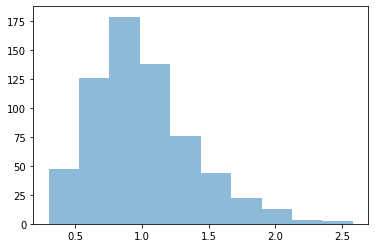

In [117]:
lengths=np.random.gamma(shape_length_x,scale_length_x,number_circuit)
plt.hist(np.random.gamma(shape_length_x,scale_length_x,number_circuit),alpha=0.5)
plt.show()
#print (lengths)
#Randomly determined circuit's ages in the base year
### I guess these numbers are not correct because I do not expect to see such circuit's ages from a gamma distribution with an average age 20.

In [220]:
#Defining Circuit class with a new approach: ommiting for t from --- to --- from class methods.
###I still do not know without using for loop, how I can manage to generate some of the required outputs.
class Circuit:
    ## The __init__ function is the constructor
    def __init__(self, shape_age_x, scale_age_x, shape_length_x, scale_length_x, overhead_proportion):        
        self.age = [np.random.gamma(shape_age_x, scale_age_x)] # set the age as a list, which can be dynamically expanded
        self.length = np.random.gamma(shape_length_x,scale_length_x) # we can assume the length is fixed over time
        overhead_probability = random.uniform(0,1)
        if overhead_probability > overhead_proportion: # if underground = 0, then segment is overhead.
            self.underground = [1] # again, a dynamic list.
        else:
            self.underground = [0]
        #self.replcost_rate=self.set_replcost_rate_array
        if self.underground[0]==1:
            self.replcost_rate=[0,underground_line['replcost']]
        else:
            self.replcost_rate=[0,overhead_line['replcost']]       
        self.replcost_value=[0]
    ###Lifecycle Infrastructure Costs:
    def get_underground_baseyear(self):
        return (self.underground[0])
    # Determining circuit's overhead or underground status in the base years 
    def get_age_baseyear(self):
        return (self.age[0])
    # Determining circuit's age in the base year
    def get_length(self):
        return (self.length)
    # Determining circuit's length
    def add_age(self):
        underground=self.underground[-1]
        if underground==1:
            lifespan_x= int(underground_line['lifespan'])
        else:
            lifespan_x= int(overhead_line['lifespan'])
        age=(self.age[-1])
        if age<(lifespan_x-1):
            age+=1
            self.age.append(age)
            self.underground.append(self.underground[-1])
        else:
            self.age.append(1)
            self.underground.append(1)
    # Adding one year to the age of circuit, compare it to the lifespan and append this age to age list. Also append underground status to its list.
    def get_underground_array(self):
        return(self.underground)
    # Returning underground list
    def get_age_array(self):
        return(self.age)
    # Returning ages list
    #def set_replcost_rate_array(self):
        #replcost=[0]
        #if self.underground[0]==1:
            #replcost.append(underground_line['replcost'])
        #else:
            #replcost.append(overhead_line['replcost'])
        #return (replcost)    
    def add_replcost_intrest_rate(self):
        underground=self.underground[-1]
        if underground==1:
            lifespan_x= int(underground_line['lifespan'])
            replcost_baseyear=underground_line['replcost']
            replcost_growth_rate_x=underground_line['replcost_growth_rate']
        else:
            lifespan_x= int(overhead_line['lifespan'])
            replcost_baseyear=overhead_line['replcost']
            replcost_growth_rate_x=overhead_line['replcost_growth_rate']
        if (self.age[-1])==1:
            replcost_x_new=underground_line['replcost']
            self.replcost_rate.append(replcost_x_new)
        else:
            replcost_x_new=(self.replcost_rate[-1])+(replcost_growth_rate_x)*(self.replcost_rate[-1])
            self.replcost_rate.append(replcost_x_new)
        return(self.replcost_rate)
    #Adding interest rate to the replacement cost based on a year and also coonsidering different replacementcost rate when underground=1
    #def set_replcost_array(self):
        #replcost=[0]
        #if self.underground[0]==1:
            #replcost.append(underground_line['replcost'])
        #else:
            #replcost.append(overhead_line['replcost'])
        #return (replcost)    
    def replecost_circuit(self):
        if (self.age[-1])==1:
            length=self.length
            replcost_rate=self.replcost_rate[-1]
            replcost_new=(replcost_rate)*(length)
            self.replcost_value.append(replcost_new)
        else:
            replcost_new=0
            self.replcost_value.append(replcost_new)
        return(self.replcost_value)
    #Determining replacement cost for each circuit.
        
        



In [223]:
for i in range (number_circuit):
    circuit_i=Circuit(shape_age_x, scale_age_x, shape_length_x, scale_length_x, 0.66)
    print(circuit_i.get_underground_baseyear())
    print(circuit_i.get_age_baseyear())
    print(circuit_i.get_length())
    for t in range (200):
        circuit_i.add_age()
        circuit_i.add_replcost_intrest_rate()
        circuit_i.replecost_circuit()
    print(circuit_i.get_underground_array())
    print(circuit_i.get_age_array())
    #print(circuit_i.set_replcost_array())
    print(circuit_i.replcost_rate)
    print(circuit_i.replcost_value)

0
0.0012707870033523794
0.9756274181930704
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0.0012707870033523794, 1.0012707870033524, 2.001270787003352, 3.001270787003352, 4.001270787003352, 5.001270787003352, 6.001270787003352, 7.001270787003352, 8.001270787003353, 9.001270787003353, 10.001270787003353, 11.001270787003353, 12.001270787003353, 13.001270787003353, 14.001270787003353, 15.001270787003353, 16.001270787003353, 17.00127078700335

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0.00038924284698844383, 1.0003892428469885, 2.0003892428469885, 3.0003892428469885, 4.000389242846989, 5.000389242846989, 6.000389242846989, 7.000389242846989, 8.000389242846989, 9.000389242846989, 10.000389242846989, 11.000389242846989, 12.000389242846989, 13.000389242846989, 14.000389242846989, 15.000389242846989, 16.00038924284699, 17.00038924284699, 18.00038924284699, 19.00038924284699, 2

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[0.5587142823354445, 1.5587142823354445, 2.5587142823354445, 3.5587142823354445, 4.558714282335444, 5.558714282335444, 6.558714282335444, 7.558714282335444, 8.558714282335444, 9.558714282335444, 10.558714282335444, 11.558714282335444, 12.558714282335444, 13.558714282335444, 14.558714282335444, 15.558714282335444, 16.558714282335444, 17.558714282335444, 18.558714282335444, 19.558714282335444, 20.558714282335444, 21.558714282335444, 22.558714282335444, 23.558714282335444, 24.558714282335444, 25.558714282335444, 26.558714282335444, 27.558714282335444, 28.558714282335444, 29.558714282335444, 30.558714282335444, 31.558714282335444, 32.558714282335444, 33.558714282335444, 34.558714282335444, 35.558714282335444, 36.558714282335444, 37.558714282335444, 38.558714282335444, 39.558714282335444, 40.558714282335444, 41.558714282335444, 42.558714282335444, 43.558714282335444, 44.558714282335444, 45.558714282335444, 46.558714282335444, 47.558714282335444, 48.558714282335444, 49.558714282335444, 50.5

In [11]:
#class Circuit:
    #def __init__(self, length, age, x):
        #self.length=length
        #self.age=age
        #self.x=x
    
#circuit_1=Circuit(25,20,0)
#circuit_2=Circuit(24,21,1)
#circuit_3=Circuit(22,22,1)
#circuit_4=Circuit(18,18,0)
#circuit_5=Circuit(25,30,1)
#circuit_6=Circuit(36,19,0)
#circuit_7=Circuit(31,29,0)
#circuit_8=Circuit(29,27,1)
#circuit_9=Circuit(25,24,0)
#circuit_10=Circuit(27,26,0)

In [12]:
random.uniform(0,1)

0.44338224056413644

In [13]:
class Circuit:
    ## The __init__ function is the constructor
    def __init__(self, shape_age_x, scale_age_x, shape_length_x, scale_length_x, overhead_proportion):        
        self.age = [np.random.gamma(shape_age_x, scale_age_x)] # set the age as a list, which can be dynamically expanded
        self.length = np.random.gamma(shape_length_x,scale_length_x) # we can assume the length is fixed over time
        overhead_probability = random.uniform(0,1)
        if overhead_probability > overhead_proportion: # if underground = 0, then segment is overhead.
            self.underground = [1] # again, a dynamic list.
        else:
            self.underground = [0]
        
###Lifecycle Infrastructure Costs:
    def get_underground(self):
        #self.over_or_under = self.underground
        return (self.underground)
    # Randomly determining status of overhead or underground of circuit
    def get_age_baseyear(self):
        #random.seed(1)
        #self.age= np.random.gamma(shape_age_x, scale_age_x)
        return (self.age)
    # Randomly determining circuit's ages in the base year
    def get_length_baseyear(self):
        #random.seed(1)
        #self.length= np.random.gamma(shape_length_x,scale_length_x)
        return (self.length)
    # Randomly determining circuit's ages in the base year
###Three above methods are defined to identify lengh, age and overhead or underground, which are three atributes of a circuit.
    #def lifespan_over_or_under(self):
        #if self.over_or_under()==0:
            #lifespan_x= overhead_line['lifespan']
        #elif self.over_or_under()==1:
            #lifespan_x= underground_line['lifespan']
        #else:
            #lifespan_x=0
        #return (lifespan_x)
    #def replcost_x_over_or_under(self):
        #if self.over_or_under==0:
            #lifespan_x= overhead_line['lifespan']
        #if self.over_or_under==1:
            #lifespan_x= underground_line['lifespan']
        #print (lifespan_x)
###Above methods are for defining different parameters in the model subject to x=0(overhead) or x=1(underground)
    
    # def set_lifespan(): # SET lifespan separately
    def get_age_array(self):
        over_or_under= self.get_underground()[0]
        if over_or_under==0:
            lifespan_x= int(overhead_line['lifespan'])
        elif over_or_under==1:
            lifespan_x= int(underground_line['lifespan'])
        #else:
            #lifespan_x=0
        age_i_baseyear= self.age[0] #self.get_age_baseyear()
        age_i_t=0
        age_i_t_array=[]
        for t in range (baseyear,baseyear+underground_line['lifespan']):
            if age_i_baseyear<=lifespan_x:
                age_i_t= (age_i_baseyear)+(t-baseyear)
                age_i_t_array.append(age_i_t)
            elif age_i_baseyear-lifespan_x==1:
                age_i_t=1
                age_i_t_array.append(age_i_t)
            elif age_i_baseyear-lifespan_x>1:
                age_i_t=(age_i_t)+1
                age_i_t_array.append(age_i_t)
        return(age_i_t_array)
    def get_current_age(self,t):
        ages_list=self.get_age_array()
        current_age=ages_list[t-baseyear]
        return(current_age)
    # Determining list of circuit's ages based on different ts
    def get_replcost_x_t(self):
        #over_or_under= self.get_underground()
        over_or_under= self.get_underground()[0]
        if over_or_under==0:
            lifespan_x=overhead_line['lifespan']
            replecost_x=overhead_line['replcost']
            replcost_growth_rate_x=overhead_line['replcost_growth_rate']
        elif over_or_under==1:
            lifespan_x= underground_line['lifespan']
            replecost_x=underground_line['replcost']
            replcost_growth_rate_x= underground_line['replcost_growth_rate']
        #else:
            #lifespan_x=0
            #replecost_x=0
            #replcost_growth_rate_x=0
        replcost_x_array=[]
        for t in range (baseyear,baseyear+underground_line['lifespan']):
            if t==baseyear:
                replcost_x_t= replecost_x
                replcost_x_array.append(replcost_x_t)
            else:
                replcost_x_t= (replecost_x)+(replcost_growth_rate_x)*(t-baseyear)*(replecost_x)
                replcost_x_array.append(replcost_x_t)
        return (replcost_x_array)
    # Determining list of replacement cost for circuite i from line x based on different ts.
    def get_capex_StatusQuo_i(self): 
        replcost_x=self.get_replcost_x_t()
        age_i=self.get_age_array()
        capex_StatusQuo_i=0
        capex_StatusQuo_list=[]
        for t in range (baseyear,baseyear+underground_line['lifespan']):
            replcost_x_t= replcost_x[t-baseyear]
            age_i_t=age_i[t-baseyear]
            if age_i_t==1:
                capex_i=((rplcost_x_t)(age_i_t))/((1+r)**(t-baseyear))
                capex_StatusQuo_i=(capex_StatusQuo_i)+(capex_i)
                capex_StatusQuo_list.append(capex_StatusQuo_i)
            else:
                capex_StatusQuo_i=0
                capex_StatusQuo_list.append(capex_StatusQuo_i)
        return (max(capex_StatusQuo_list))
    #Determining list of Status quo capital expenses (CAPEX) occurring in future years (t) when the age of the circuit exceeds the expected useful lifespan
    def get_opex_x_t(self):
        over_or_under= self.get_underground()[0]
        age_i=self.get_age_array()
        replcost_x=self.get_replcost_x_t()
        if over_or_under==0:
            om_percentage_replcost_x=overhead_line['om_percentage_replcost']
        elif over_or_under==1:
            om_percentage_replcost_x= underground_line['om_percentage_replcost']
        #else:
            #om_percentage_replcost_x=0
        opex_x_t_array=[]
        for t in range (baseyear,baseyear+underground_line['lifespan']):
            opex_x_t=0
            age_i_t=age_i[t-baseyear]
            replcost_x_t=replcost_x[t-baseyear]
            if age_i_t==1:
                opex_x_t=(om_percentage_replcost_x)*(replcost_x_t)
                opex_x_t_array.append(opex_x_t)
            elif age_i_t>1:
                opex_x_t=(om_percentage_replcost_x)*(replcost_x_t)
                opex_x_t=(opex_x_t)+(om_percentage_replcost_x)*(replcost_x_t)
                opex_x_t_array.append(opex_x_t)
            else:
                None
        return (opex_x_t_array)
    #Annual operation and maintenance expenses for each line
    def get_opex_StatusQuo_i(self):
        opex_x=self.get_opex_x_t()
        length_i=self.get_length_baseyear()
        opex_StatusQuo_i=0
        for t in range (baseyear,baseyear+underground_line['lifespan']):
            opex_x_t=opex_x[t-baseyear]
            opex_i=((opex_x_t)*(length_i))/((1+r)**(t-baseyear))
            opex_StatusQuo_i=(opex_StatusQuo_i)+(opex_i)
        return (opex_StatusQuo_i)
    #Discounting annual O&M expenses incurred for each circuit 
    def get_lifecyclecost_StatusQuo(self):
        lifecyclecost_StatusQuo=0
        for i in range (number_circuit):
            capex_StatusQuo_i=self.get_capex_StatusQuo_i()
            opex_StatusQuo_i=self.get_opex_StatusQuo_i()
            lifecyclecost_i=capex_StatusQuo_i+opex_StatusQuo_i
            lifecyclecost_StatusQuo=lifecyclecost_StatusQuo+lifecyclecost_i
        return (lifecyclecost_StatusQuo)
    #Total lifecycle costs, under the status quo
###Above methods are required methods for determining lifecycle costs associated with status quo
    def get_first_retire_i(self):
        age_baseyear=self.get_age_baseyear()
        age_baseyear_i=age_baseyear[0]
        over_or_under= self.get_underground()[0]
        if over_or_under==0:
            lifespan_x=overhead_line['lifespan']
        elif over_or_under==1:
            lifespan_x= underground_line['lifespan']
        #else:
            #lifespan_x=0
        first_retire_i=(lifespan_x)-(age_baseyear_i)+baseyear
        return (first_retire_i)
    #Determining the first retirement year Under the undergrounding alternative
    def get_capex_underground_i(self):
        over_or_under= circuit_i.get_underground()[0]
        if over_or_under==0:
            self.underground=1
            over_or_under==1
        length_i=self.get_length_baseyear()
        rplcost_x=self.get_replcost_x_t()
        age_i=self.get_age_array()
        capex_underground_i=0
        capex_underground_list=[]
        for t in range (baseyear,baseyear+underground_line['lifespan']):
            replcost_x_t= rplcost_x[t-baseyear]
            age_i_t=age_i[t-baseyear]
            if age_i_t==1:
                capex_i=((rplcost_x_t)*(length_i))/((1+r)**(t-baseyear))
                capex_underground_i=(capex_underground_i)+(capex_i)
                capex_underground_list.append(capex_underground_i)
        return (capex_underground_list)
    #Undergrounding capital expenses
    def get_opex_underground_i (self):
        over_or_under= circuit_i.get_underground()[0]
        opex_x=self.get_opex_x_t()
        length_i=self.get_length_baseyear()
        first_retire_i=self.get_first_retire_i()
        opex_underground_i=0
        for t in range (baseyear,baseyear+underground_line['lifespan']):
            opex_x_t=opex_x[t-baseyear]
            if  over_or_under==1:
                opex_i=((opex_x_t)*(length_i))/((1+r)**(t-baseyear))
                opex_underground_i=(opex_underground_i)+(opex_i)
            else:        
                if t< first_retire_i:
                    opex_i=((opex_x_t)*(length_i))/((1+r)**(t-baseyear))
                    opex_underground_i=(opex_underground_i)+(opex_i)
                else:
                    over_or_under==1
                    opex_i=((opex_x_t)*(length_i))/((1+r)**(t-baseyear))
                    opex_underground_i=(opex_underground_i)+(opex_i)
        return (opex_underground_i)
    #Annual operation and maintenance expenses for each line Under the undergrounding alternative
    def get_lifecyclecost_underground(self):
        lifecyclecost_underground=0
        for i in range (number_circuit):
            capex_underground_i=self.get_capex_underground_i()
            opex_underground_i=self.get_opex_underground_i()
            lifecyclecost_i= capex_underground_i+opex_underground_i
            lifecyclecost_underground=lifecyclecost_underground+lifecyclecost_i
        return (lifecyclecost_underground)
    #Total lifecycle costs, under the underground alternative.
###Above methods are required methods for determining lifecycle costs associated with underground alternative.
    def underground_t(self):
        first_retire_i=self.get_first_retire_i()
        length_i=self.get_length_baseyear()
        for t in range (baseyear,baseyear+underground_line['lifespan']):
            if t>= first_retire_i:
                sumlength=0
                for i in range (number_circuit):
                    sumlength=sumlength+length_i
                    return (sumlength)
                underground_t=underground_baseyear+sumlength
            else:
                underground_t=underground_baseyear
        return(underground_t)
    #Determining future annual underground line mileage
    def lifecycle_net(self):
        lifecyclecost_underground=self.get_lifecyclecost_underground()
        lifecyclecost_StatusQuo=self.get_lifecyclecost_StatusQuo()
        lifecycle_net=lifecyclecost_underground-lifecyclecost_StatusQuo
    #Determining the additional lifecycle costs due to undergrounding                    
###Ecosystem-related Restoration Costs:
    def restoration_statusQuo(self):
        for t in range (baseyear,baseyear+underground_line['lifespan']):
            for i in range (number_circuit):
                sum_lengh_i_t=0
                length_i_t= self.get_length_baseyear()
                sum_lengh_i_t=sum_lengh_i_t+length_i_t
            return (length_i_t)
###Construction-related Morbidity and Mortality Costs:
       

In [14]:
circuit_i=Circuit(shape_age_x, scale_age_x, shape_length_x, scale_length_x, 0.66)
circuit_over_or_under=circuit_i.get_underground()
print(circuit_over_or_under)
circuit_age_baseyear=circuit_i.get_age_baseyear
print(circuit_age_baseyear)
circuit_length_baseyear=circuit_i.get_length_baseyear
print(circuit_length_baseyear)
circuit_age_baseyear=circuit_i.get_age_baseyear()
print (circuit_age_baseyear)
#circuit_age_i_t_list=[]  
age_i_list=circuit_i.get_age_array()
print(age_i_list)
#Circuit i ages list in different ts 
age_i_t=circuit_i.get_current_age(2030)
print(age_i_t)
#circuit i age in current year t (which should be entered to the method as an input)
#print('x=',circuit_over_or_under,'&','Segment age in baseyear=',circuit_age_baseyear,'&','Segment age in t=',circuit_age_i_t_list)
# Producing overhead or underground status, age in base year and age in year t for a circuite using class methods
# I do not know how I can change produced x in a way to produce 66% x=0 and 44% x=1.

[1]
<bound method Circuit.get_random_age_baseyear of <__main__.Circuit object at 0x000001C054170E20>>
<bound method Circuit.get_random_length_baseyear of <__main__.Circuit object at 0x000001C054170E20>>
[0.0011444667293813208]
[0.0011444667293813208, 1.0011444667293814, 2.0011444667293814, 3.0011444667293814, 4.001144466729381, 5.001144466729381, 6.001144466729381, 7.001144466729381, 8.00114446672938, 9.00114446672938, 10.00114446672938, 11.00114446672938, 12.00114446672938, 13.00114446672938, 14.00114446672938, 15.00114446672938, 16.001144466729382, 17.001144466729382, 18.001144466729382, 19.001144466729382, 20.001144466729382, 21.001144466729382, 22.001144466729382, 23.001144466729382, 24.001144466729382, 25.001144466729382, 26.001144466729382, 27.001144466729382, 28.001144466729382, 29.001144466729382, 30.001144466729382, 31.001144466729382, 32.00114446672938, 33.00114446672938, 34.00114446672938, 35.00114446672938, 36.00114446672938, 37.00114446672938, 38.00114446672938, 39.0011444

In [15]:
for i in range (number_circuit):
    circuit_i=Circuit(shape_age_x, scale_age_x, shape_length_x, scale_length_x, random.uniform(0,1))
    circuit_over_or_under=circuit_i.get_underground()
    #print(circuit_over_or_under)
    circuit_age_baseyear=circuit_i.get_age_baseyear()
    #print (circuit_age_baseyear)     
    circuit_age_i_t_list=circuit_i.get_age_array()
    #print(len(circuit_age_i_t_list))
    print('x=',circuit_over_or_under,'&','Segment age in baseyear=',circuit_age_baseyear,'&','Segment age in t=',circuit_age_i_t_list)
# Producing overhead or underground status, age in base year and age in year t for a circuite using class methods
# I do not know why i just get circuit_age_i_t_list=[] in the output. I expected to see t numbers of ages in that list. one per each year.
# I do not know how I can change produced x in a way to produce 66% x=0 and 44% x=1.

x= [1] & Segment age in baseyear= [0.02753482082286077] & Segment age in t= [0.02753482082286077, 1.0275348208228607, 2.027534820822861, 3.027534820822861, 4.0275348208228605, 5.0275348208228605, 6.0275348208228605, 7.0275348208228605, 8.027534820822861, 9.027534820822861, 10.027534820822861, 11.027534820822861, 12.027534820822861, 13.027534820822861, 14.027534820822861, 15.027534820822861, 16.02753482082286, 17.02753482082286, 18.02753482082286, 19.02753482082286, 20.02753482082286, 21.02753482082286, 22.02753482082286, 23.02753482082286, 24.02753482082286, 25.02753482082286, 26.02753482082286, 27.02753482082286, 28.02753482082286, 29.02753482082286, 30.02753482082286, 31.02753482082286, 32.02753482082286, 33.02753482082286, 34.02753482082286, 35.02753482082286, 36.02753482082286, 37.02753482082286, 38.02753482082286, 39.02753482082286, 40.02753482082286, 41.02753482082286, 42.02753482082286, 43.02753482082286, 44.02753482082286]
x= [1] & Segment age in baseyear= [0.000171219903378534

x= [1] & Segment age in baseyear= [4.303241075537541] & Segment age in t= [4.303241075537541, 5.303241075537541, 6.303241075537541, 7.303241075537541, 8.303241075537542, 9.303241075537542, 10.303241075537542, 11.303241075537542, 12.303241075537542, 13.303241075537542, 14.303241075537542, 15.303241075537542, 16.303241075537542, 17.303241075537542, 18.303241075537542, 19.303241075537542, 20.303241075537542, 21.303241075537542, 22.303241075537542, 23.303241075537542, 24.303241075537542, 25.303241075537542, 26.303241075537542, 27.303241075537542, 28.303241075537542, 29.303241075537542, 30.303241075537542, 31.303241075537542, 32.30324107553754, 33.30324107553754, 34.30324107553754, 35.30324107553754, 36.30324107553754, 37.30324107553754, 38.30324107553754, 39.30324107553754, 40.30324107553754, 41.30324107553754, 42.30324107553754, 43.30324107553754, 44.30324107553754, 45.30324107553754, 46.30324107553754, 47.30324107553754, 48.30324107553754]
x= [0] & Segment age in baseyear= [0.02459532962

x= [0] & Segment age in baseyear= [0.0003375167959875804] & Segment age in t= [0.0003375167959875804, 1.0003375167959876, 2.0003375167959874, 3.0003375167959874, 4.000337516795987, 5.000337516795987, 6.000337516795987, 7.000337516795987, 8.000337516795987, 9.000337516795987, 10.000337516795987, 11.000337516795987, 12.000337516795987, 13.000337516795987, 14.000337516795987, 15.000337516795987, 16.000337516795987, 17.000337516795987, 18.000337516795987, 19.000337516795987, 20.000337516795987, 21.000337516795987, 22.000337516795987, 23.000337516795987, 24.000337516795987, 25.000337516795987, 26.000337516795987, 27.000337516795987, 28.000337516795987, 29.000337516795987, 30.000337516795987, 31.000337516795987, 32.00033751679599, 33.00033751679599, 34.00033751679599, 35.00033751679599, 36.00033751679599, 37.00033751679599, 38.00033751679599, 39.00033751679599, 40.00033751679599, 41.00033751679599, 42.00033751679599, 43.00033751679599, 44.00033751679599]
x= [1] & Segment age in baseyear= [4.

x= [0] & Segment age in baseyear= [5.136588749950693e-06] & Segment age in t= [5.136588749950693e-06, 1.00000513658875, 2.00000513658875, 3.00000513658875, 4.00000513658875, 5.00000513658875, 6.00000513658875, 7.00000513658875, 8.00000513658875, 9.00000513658875, 10.00000513658875, 11.00000513658875, 12.00000513658875, 13.00000513658875, 14.00000513658875, 15.00000513658875, 16.00000513658875, 17.00000513658875, 18.00000513658875, 19.00000513658875, 20.00000513658875, 21.00000513658875, 22.00000513658875, 23.00000513658875, 24.00000513658875, 25.00000513658875, 26.00000513658875, 27.00000513658875, 28.00000513658875, 29.00000513658875, 30.00000513658875, 31.00000513658875, 32.00000513658875, 33.00000513658875, 34.00000513658875, 35.00000513658875, 36.00000513658875, 37.00000513658875, 38.00000513658875, 39.00000513658875, 40.00000513658875, 41.00000513658875, 42.00000513658875, 43.00000513658875, 44.00000513658875]
x= [1] & Segment age in baseyear= [3.4851497496219186] & Segment age in

In [16]:
circuit_i=Circuit(shape_age_x,scale_age_x,shape_length_x,scale_length_x,random.uniform(0,1))
replcost_x_t_i=circuit_i.get_replcost_x_t()
print(replcost_x_t_i)
capex_StatusQuo_i=circuit_i.get_capex_StatusQuo_i()
print(capex_StatusQuo_i)
opex_x_t=circuit_i.get_opex_x_t()
print(opex_x_t)
opex_StatusQuo_i=circuit_i.get_opex_StatusQuo_i()
print(opex_StatusQuo_i)
lifecyclecost_StatusQuo=circuit_i.get_lifecyclecost_StatusQuo()
print(lifecyclecost_StatusQuo)
# Test producing replacement cost_xt, capex_StatusQuo_i, opex_x_t, opex_StatusQuo and lifecyclecost_StatusQuo for a circuite using class methods related to status quo.
# I do not know yet that why the output of model is wrong and also I do not know how I can fix the issue: TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

[104000, 106080.0, 108160.0, 110240.0, 112320.0, 114400.0, 116480.0, 118560.0, 120640.0, 122720.0, 124800.0, 126880.0, 128960.0, 131040.0, 133120.0, 135200.0, 137280.0, 139360.0, 141440.0, 143520.0, 145600.0, 147680.0, 149760.0, 151840.0, 153920.0, 156000.0, 158080.0, 160160.0, 162240.0, 164320.0, 166400.0, 168480.0, 170560.0, 172640.0, 174720.0, 176800.0, 178880.0, 180960.0, 183040.0, 185120.0, 187200.0, 189280.0, 191360.0, 193440.0, 195520.0]
0
[1060.8, 1081.6, 1102.4, 1123.2, 1144.0, 1164.8, 1185.6000000000001, 1206.4, 1227.2, 1248.0, 1268.8, 1289.6000000000001, 1310.4, 1331.2, 1352.0, 1372.8, 1393.6000000000001, 1414.4, 1435.2, 1456.0, 1476.8, 1497.6000000000001, 1518.4, 1539.2, 1560.0, 1580.8, 1601.6000000000001, 1622.4, 1643.2, 1664.0, 1684.8, 1705.6000000000001, 1726.4, 1747.2, 1768.0, 1788.8, 1809.6000000000001, 1830.4, 1851.2, 1872.0, 1892.8, 1913.6000000000001, 1934.4, 1955.2]


IndexError: list index out of range

In [17]:
circuit_i=Circuit(shape_age_x,scale_age_x,shape_length_x,scale_length_x,random.uniform(0,1))
first_retire_i=circuit_i.get_first_retire_i()
print(first_retire_i)
capex_underground_i=circuit_i.get_capex_underground_i()
print(capex_underground_i)
opex_underground_i=circuit_i.get_opex_underground_i()
print(opex_underground_i)
lifecyclecost_underground=circuit_i.get_lifecyclecost_underground()
print(ifecyclecost_underground)
underground_t=circuit_i.underground_t()
print(underground_t)
# Test producing first_retire_i, capex_underground_i, opex_underground_i, ifecyclecost_underground and underground_t for a circuite using class methods related to undergrounding alternative.
# I do not know yet that why the output of model is wrong and also I do not know how I can fix the issue: TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

2065.9762434300283
[]


IndexError: list index out of range

In [ ]:
#circuit_i=Circuit(shape_age_x, scale_age_x, shape_length_x, scale_length_x, 0.66)
#opex_x=circuit_i.get_opex_x_t()
#print(opex_x)
#for t in range (baseyear,baseyear+underground_line['lifespan']):
    #opex_x_t=opex_x[t-baseyear]
    #print(opex_x_t)
# I tested this part separately. It works and the list index is not out of range. I do not know why I get this error.